In [ ]:
import os
import pandas as pd
import numpy as np
from pandas import read_csv

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/наборы данных')

In [ ]:
filename='sloth_data.csv'

In [ ]:
df=read_csv(filename)

In [ ]:
df

,Unnamed: 0,claw_length_cm,endangered,size_cm,specie,sub_specie,tail_length_cm,weight_kg
0,0,6.825,critically_endangered,52.004,three_toed,Pygmy three-toed sloth,4.448,3.570
1,1,8.260,critically_endangered,50.082,three_toed,Pygmy three-toed sloth,6.286,2.844
2,2,8.662,critically_endangered,51.498,three_toed,Pygmy three-toed sloth,4.551,1.259
3,3,8.467,critically_endangered,50.122,three_toed,Pygmy three-toed sloth,6.983,2.392
4,4,7.104,critically_endangered,51.364,three_toed,Pygmy three-toed sloth,5.411,3.163
...,...,...,...,...,...,...,...,...
4995,4995,3.919,least_concern,62.819,two_toed,Hoffman’s two-toed sloth,3.176,4.247
4996,4996,5.881,least_concern,63.150,two_toed,Hoffman’s two-toed sloth,1.535,4.056
4997,4997,4.941,least_concern,62.091,two_toed,Hoffman’s two-toed sloth,1.905,5.194
4998,4998,6.176,least_concern,62.039,two_toed,Hoffman’s two-toed sloth,1.164,5.035


In [ ]:
df.sub_specie.value_counts()

Hoffman’s two-toed sloth     1198
Linnaeus’s two-toed sloth    1140
Pale-throated sloth          1050
Brown-throated sloth         1002
Maned three-toed sloth        537
Pygmy three-toed sloth         73
Name: sub_specie, dtype: int64

In [ ]:
df.specie.value_counts()

three_toed    2662
two_toed      2338
Name: specie, dtype: int64

In [ ]:
df.endangered.value_counts()

least_concern            4390
vulnerable                537
critically_endangered      73
Name: endangered, dtype: int64

In [ ]:
df.isna().sum() # нет нулей

Unnamed: 0        0
claw_length_cm    0
endangered        0
size_cm           0
specie            0
sub_specie        0
tail_length_cm    0
weight_kg         0
dtype: int64

In [ ]:
df.dtypes

Unnamed: 0          int64
claw_length_cm    float64
endangered         object
size_cm           float64
specie             object
sub_specie         object
tail_length_cm    float64
weight_kg         float64
dtype: object

**переводим 'object' в число**

In [ ]:
# степень угрозы переводим в цифры от 0 до 3, чем больше число, тем выше угроза
df['endangered_code']=np.where(df['endangered']=='least_concern',1,
                     (np.where(df['endangered']=='vulnerable',2,3)))

In [ ]:
# количество ног переводим в цифры, 2 -две ноги, 3 - три ноги
df['specie_code']=np.where(df['specie']=='two_toed',2,3)

In [ ]:
# пеевод подвида ленивца в цифры от 1 до 6
df['sub_specie_code']=np.where(df['sub_specie']=='Hoffman’s two-toed sloth',1,
                (np.where(df['sub_specie']=='Linnaeus’s two-toed sloth',2,
                (np.where(df['sub_specie']=='Pale-throated sloth',3,
                (np.where(df['sub_specie']=='Brown-throated sloth',4,
                (np.where(df['sub_specie']=='Maned three-toed sloth',5,6)))))))))

In [ ]:
df

,Unnamed: 0,claw_length_cm,endangered,size_cm,specie,sub_specie,tail_length_cm,weight_kg,endangered_code,specie_code,sub_specie_code
0,0,6.825,critically_endangered,52.004,three_toed,Pygmy three-toed sloth,4.448,3.570,3,3,6
1,1,8.260,critically_endangered,50.082,three_toed,Pygmy three-toed sloth,6.286,2.844,3,3,6
2,2,8.662,critically_endangered,51.498,three_toed,Pygmy three-toed sloth,4.551,1.259,3,3,6
3,3,8.467,critically_endangered,50.122,three_toed,Pygmy three-toed sloth,6.983,2.392,3,3,6
4,4,7.104,critically_endangered,51.364,three_toed,Pygmy three-toed sloth,5.411,3.163,3,3,6
...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,3.919,least_concern,62.819,two_toed,Hoffman’s two-toed sloth,3.176,4.247,1,2,1
4996,4996,5.881,least_concern,63.150,two_toed,Hoffman’s two-toed sloth,1.535,4.056,1,2,1
4997,4997,4.941,least_concern,62.091,two_toed,Hoffman’s two-toed sloth,1.905,5.194,1,2,1
4998,4998,6.176,least_concern,62.039,two_toed,Hoffman’s two-toed sloth,1.164,5.035,1,2,1


In [ ]:
data = df.iloc[:,1:8] # сохранили исходные данные в переменной data
data

In [ ]:
df = df.drop(['Unnamed: 0', 'endangered','specie', 'sub_specie'], axis='columns')

In [ ]:
df

,claw_length_cm,size_cm,tail_length_cm,weight_kg,endangered_code,specie_code,sub_specie_code
0,6.825,52.004,4.448,3.570,3,3,6
1,8.260,50.082,6.286,2.844,3,3,6
2,8.662,51.498,4.551,1.259,3,3,6
3,8.467,50.122,6.983,2.392,3,3,6
4,7.104,51.364,5.411,3.163,3,3,6
...,...,...,...,...,...,...,...
4995,3.919,62.819,3.176,4.247,1,2,1
4996,5.881,63.150,1.535,4.056,1,2,1
4997,4.941,62.091,1.905,5.194,1,2,1
4998,6.176,62.039,1.164,5.035,1,2,1


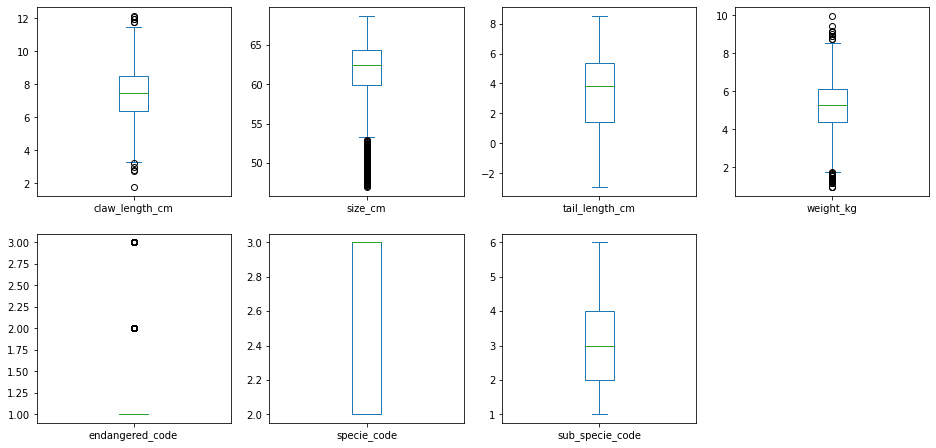

In [ ]:
import matplotlib.pyplot as plt
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(16,16))
plt.show()

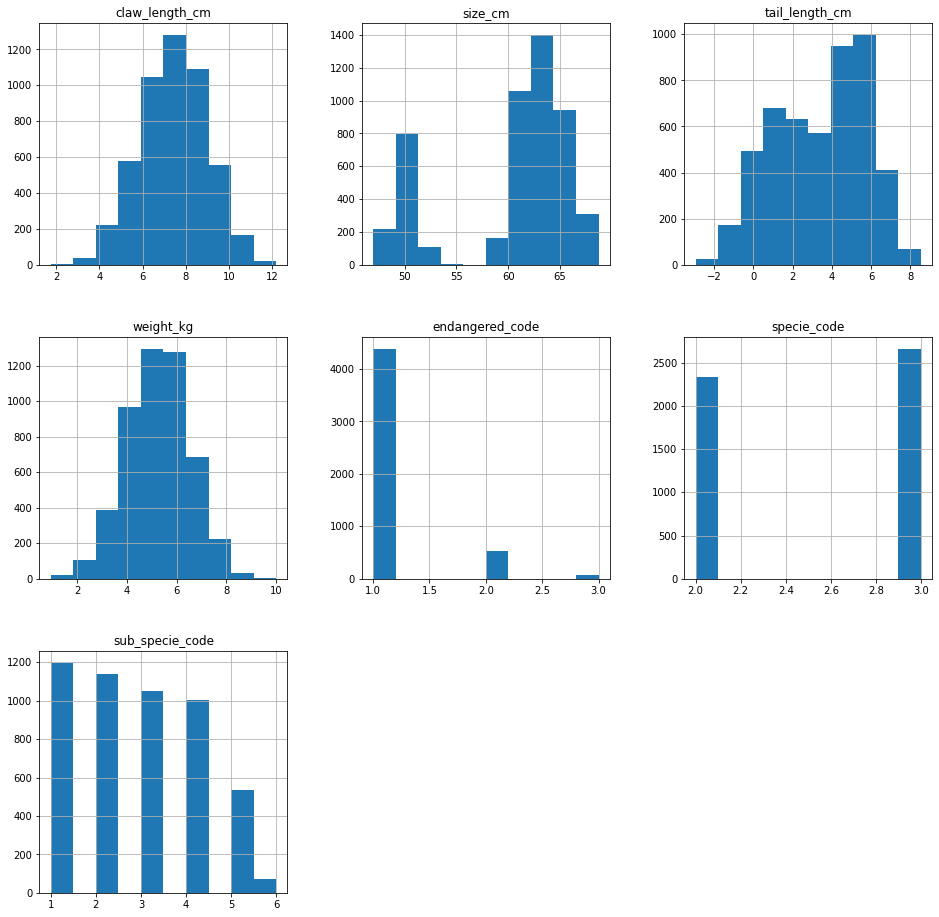

In [ ]:
df.hist(figsize=(16,16))
plt.show()

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(16,16))
plt.show()

In [ ]:
df.columns

Index(['claw_length_cm', 'size_cm', 'tail_length_cm', 'weight_kg',
       'endangered_code', 'specie_code', 'sub_specie_code'],
      dtype='object')

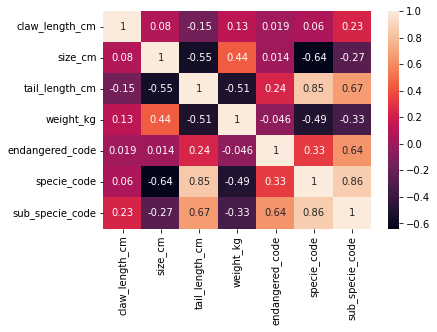

In [ ]:
import seaborn as sns
myBasicCorr = df.corr()
sns.heatmap(myBasicCorr, annot = True)

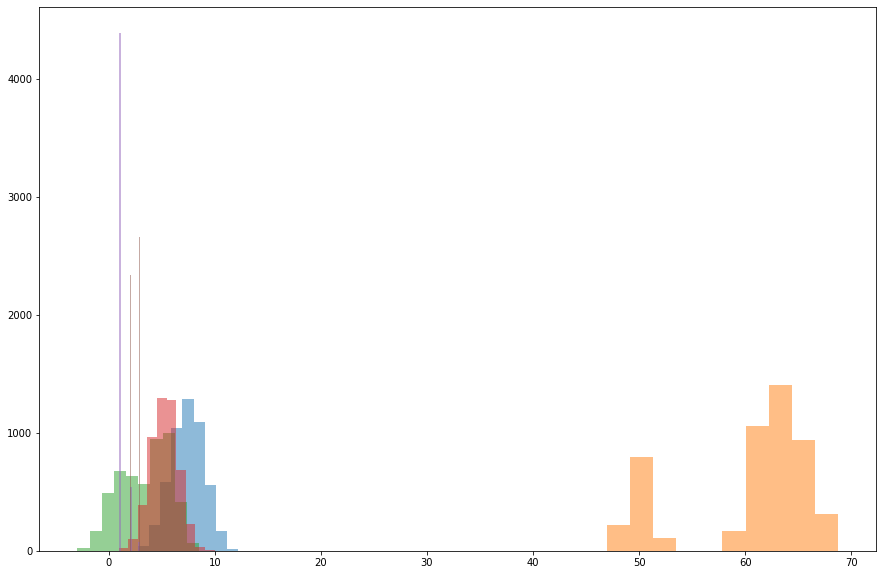

In [ ]:
plt.figure(figsize=(15,10))

plt.hist(df['claw_length_cm'], alpha = 0.5, label='b')
plt.hist(df['size_cm'], alpha = 0.5, label='b')
plt.hist(df['tail_length_cm'], alpha = 0.5, label='b')
plt.hist(df['weight_kg'], alpha = 0.5, label='b')
plt.hist(df['endangered_code'], alpha = 0.5, label='b')
plt.hist(df['specie_code'], alpha = 0.5, label='b')
plt.show()

In [ ]:
df.head(5)

,claw_length_cm,size_cm,tail_length_cm,weight_kg,endangered_code,specie_code,sub_specie_code
0,6.825,52.004,4.448,3.570,3,3,6
1,8.260,50.082,6.286,2.844,3,3,6
2,8.662,51.498,4.551,1.259,3,3,6
3,8.467,50.122,6.983,2.392,3,3,6
4,7.104,51.364,5.411,3.163,3,3,6


In [ ]:
X = df.iloc[:,:6].values
X

array([[ 6.825, 52.004,  4.448,  3.57 ,  3.   ,  3.   ],
       [ 8.26 , 50.082,  6.286,  2.844,  3.   ,  3.   ],
       [ 8.662, 51.498,  4.551,  1.259,  3.   ,  3.   ],
       ...,
       [ 4.941, 62.091,  1.905,  5.194,  1.   ,  2.   ],
       [ 6.176, 62.039,  1.164,  5.035,  1.   ,  2.   ],
       [ 3.494, 64.043,  1.512,  6.384,  1.   ,  2.   ]])

In [ ]:
Y = df.iloc[:,6].values
Y

array([6, 6, 6, ..., 1, 1, 1])

**масштабирование:**

In [ ]:
from pandas.core.apply import FrameApply
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [ ]:
rescaledX=scaler.fit_transform(X)
rescaledX

array([[0.48709585, 0.23250275, 0.64372822, 0.28991272, 1.        ,
        1.        ],
       [0.62477214, 0.14446684, 0.80383275, 0.20970059, 1.        ,
        1.        ],
       [0.66334069, 0.20932576, 0.65270035, 0.03458181, 1.        ,
        1.        ],
       ...,
       [0.30634174, 0.69453096, 0.42221254, 0.4693404 , 0.        ,
        0.        ],
       [0.4248297 , 0.69214914, 0.35766551, 0.45177328, 0.        ,
        0.        ],
       [0.16751415, 0.783941  , 0.38797909, 0.60081759, 0.        ,
        0.        ]])

In [ ]:
from numpy import set_printoptions
set_printoptions(precision=3)

In [ ]:
rescaledX

array([[0.487, 0.233, 0.644, 0.29 , 1.   , 1.   ],
       [0.625, 0.144, 0.804, 0.21 , 1.   , 1.   ],
       [0.663, 0.209, 0.653, 0.035, 1.   , 1.   ],
       ...,
       [0.306, 0.695, 0.422, 0.469, 0.   , 0.   ],
       [0.425, 0.692, 0.358, 0.452, 0.   , 0.   ],
       [0.168, 0.784, 0.388, 0.601, 0.   , 0.   ]])

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler().fit(X) # создаем объект и обучаем

In [ ]:
rescaledX=scaler.transform(X) # преобразуем данные

In [ ]:
rescaledX

array([[-0.394, -1.416,  0.445, -1.327,  4.858,  0.937],
       [ 0.55 , -1.74 ,  1.232, -1.9  ,  4.858,  0.937],
       [ 0.815, -1.501,  0.489, -3.15 ,  4.858,  0.937],
       ...,
       [-1.633,  0.285, -0.645, -0.047, -0.356, -1.067],
       [-0.821,  0.276, -0.963, -0.172, -0.356, -1.067],
       [-2.585,  0.614, -0.814,  0.892, -0.356, -1.067]])

In [ ]:
import pandas as pd
fg = pd.DataFrame(rescaledX, columns=('claw_length_cm',	'size_cm',	'tail_length_cm',	'weight_kg',	'endangered_code',	'specie_code'))
fg.head(15)

,claw_length_cm,size_cm,tail_length_cm,weight_kg,endangered_code,specie_code
0,-0.393654,-1.415976,0.444677,-1.327407,4.857805,0.93717
1,0.550189,-1.740125,1.232485,-1.899927,4.857805,0.93717
2,0.814597,-1.501314,0.488825,-3.149852,4.857805,0.93717
3,0.686339,-1.733379,1.531235,-2.256373,4.857805,0.93717
4,-0.210147,-1.523913,0.857441,-1.648365,4.857805,0.93717
5,-0.102279,-1.662882,0.112066,-1.536385,4.857805,0.93717
6,-0.150293,-1.810958,0.329377,-1.892041,4.857805,0.93717
7,0.020716,-1.586989,0.003196,-1.097925,4.857805,0.93717
8,-0.427856,-2.025652,1.367501,-0.600321,4.857805,0.93717
9,0.484416,-1.839123,0.277514,-3.382488,4.857805,0.93717


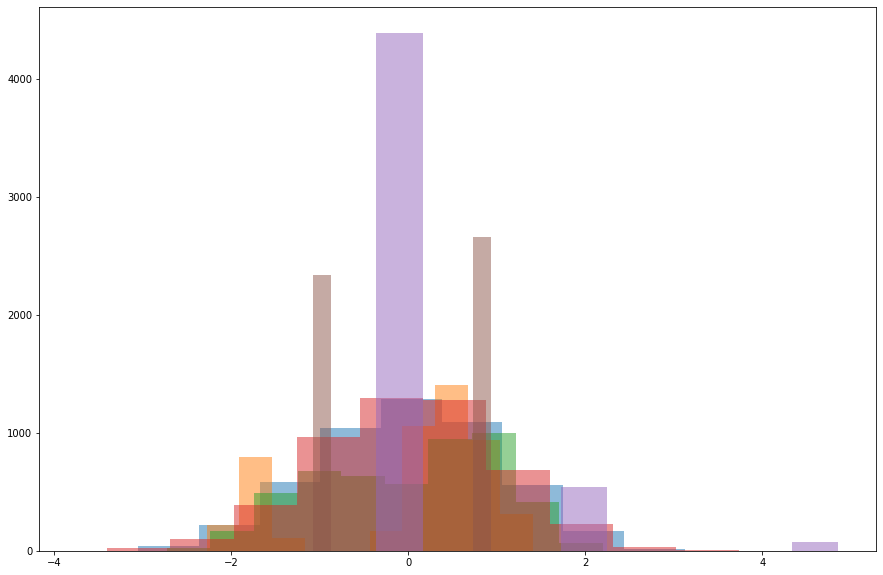

In [ ]:
plt.figure(figsize=(15,10))

plt.hist(fg['claw_length_cm'], alpha = 0.5, label='b')
plt.hist(fg['size_cm'], alpha = 0.5, label='b')
plt.hist(fg['tail_length_cm'], alpha = 0.5, label='b')
plt.hist(fg['weight_kg'], alpha = 0.5, label='b')
plt.hist(fg['endangered_code'], alpha = 0.5, label='b')
plt.hist(fg['specie_code'], alpha = 0.5, label='b')
plt.show()

In [ ]:
plt.figure(figsize=(15,10))

#plt.hist(fg['claw_length_cm'], alpha = 0.5, label='b')
#plt.hist(fg['size_cm'], alpha = 0.5, label='b')
#plt.hist(fg['tail_length_cm'], alpha = 0.5, label='b')
#plt.hist(fg['weight_kg'], alpha = 0.5, label='b')
plt.hist(fg['endangered_code'], alpha = 0.5, label='b')
#plt.hist(fg['specie_code'], alpha = 0.5, label='b')
plt.show()

# **КРАСОТА!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!**

In [ ]:
fg

,claw_length_cm,size_cm,tail_length_cm,weight_kg,endangered_code,specie_code
0,-0.393654,-1.415976,0.444677,-1.327407,4.857805,0.937170
1,0.550189,-1.740125,1.232485,-1.899927,4.857805,0.937170
2,0.814597,-1.501314,0.488825,-3.149852,4.857805,0.937170
3,0.686339,-1.733379,1.531235,-2.256373,4.857805,0.937170
4,-0.210147,-1.523913,0.857441,-1.648365,4.857805,0.937170
...,...,...,...,...,...,...
4995,-2.305017,0.407994,-0.100531,-0.793527,-0.356110,-1.067043
4996,-1.014551,0.463818,-0.803901,-0.944149,-0.356110,-1.067043
4997,-1.632817,0.285215,-0.645310,-0.046727,-0.356110,-1.067043
4998,-0.820520,0.276445,-0.962920,-0.172114,-0.356110,-1.067043


In [ ]:
set_printoptions(precision=3)

In [ ]:
df = round(fg,3)

In [ ]:
df

,claw_length_cm,size_cm,tail_length_cm,weight_kg,endangered_code,specie_code
0,-0.394,-1.416,0.445,-1.327,4.858,0.937
1,0.550,-1.740,1.232,-1.900,4.858,0.937
2,0.815,-1.501,0.489,-3.150,4.858,0.937
3,0.686,-1.733,1.531,-2.256,4.858,0.937
4,-0.210,-1.524,0.857,-1.648,4.858,0.937
...,...,...,...,...,...,...
4995,-2.305,0.408,-0.101,-0.794,-0.356,-1.067
4996,-1.015,0.464,-0.804,-0.944,-0.356,-1.067
4997,-1.633,0.285,-0.645,-0.047,-0.356,-1.067
4998,-0.821,0.276,-0.963,-0.172,-0.356,-1.067


In [ ]:
df.shape

(5000, 6)

In [ ]:
Y.shape

(5000,)

In [ ]:
df['df_result'] = pd.Series(Y)

In [ ]:
X = df.iloc[:,:-1].values
X

array([[-0.394, -1.416,  0.445, -1.327,  4.858,  0.937],
       [ 0.55 , -1.74 ,  1.232, -1.9  ,  4.858,  0.937],
       [ 0.815, -1.501,  0.489, -3.15 ,  4.858,  0.937],
       ...,
       [-1.633,  0.285, -0.645, -0.047, -0.356, -1.067],
       [-0.821,  0.276, -0.963, -0.172, -0.356, -1.067],
       [-2.585,  0.614, -0.814,  0.892, -0.356, -1.067]])

In [ ]:
Y

array([6, 6, 6, ..., 1, 1, 1])

# **ОБУЧАЛКИ**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

# **k-ближайших соседей:**

In [ ]:
kfold=KFold(n_splits=10,random_state=7,shuffle=True)

In [ ]:
model=KNeighborsClassifier() # по умолчанию k = 5

In [ ]:
results=cross_val_score(model, X, Y, cv=kfold)

In [ ]:
model.fit(X,Y)

KNeighborsClassifier()

In [ ]:
results.mean(),results.std()

(0.9926, 0.0043863424398922655)

**проверка:**

In [ ]:
df

In [ ]:
3.919,	62.819,	3.176,	4.247,	1,	2 # для 1-го
7.104,	51.364,	5.411,	3.163,	3,	3 # для 6-го

In [ ]:
x_new=np.array([[0.686,	-1.4,	1.531,	-2.0,	4.858,	0.937],[-1.015,	0.464,	-0.6,	-0.6,	-0.4,	-1.08]])

In [ ]:
model.predict(x_new)

array([6, 1])

In [ ]:
model.predict_proba(x_new)

array([[0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.]])

# **Наивный байесовский классификатор:**

In [ ]:
model=GaussianNB()

In [ ]:
results=cross_val_score(model, X, Y, cv=kfold)

In [ ]:
results.mean()

0.9942

In [ ]:
results.std()

0.003944616584663207

In [ ]:
model.fit(X,Y)

GaussianNB()

In [ ]:
model.predict(x_new)

array([6, 1])

In [ ]:
model.predict_proba(x_new)

array([[0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00],
       [1.000e+00, 1.401e-05, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]])

# **Дерево решений:**

In [ ]:
model=DecisionTreeClassifier()

In [ ]:
results=cross_val_score(model, X, Y, cv=kfold)

In [ ]:
results.mean()

0.9911999999999999

In [ ]:
results.std()

0.004664761515876244

In [ ]:
model.fit(X,Y)

DecisionTreeClassifier()

In [ ]:
model.predict(x_new)

array([6, 1])

In [ ]:
model.predict_proba(x_new)

array([[0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.]])

In [ ]:
models=[]

In [ ]:
models.append(('LR',LogisticRegression(solver='liblinear'))) # логистическоая регрессия

In [ ]:
models.append(('SVM',SVC(kernel='linear'))) # метод опорных векторов

In [ ]:
models.append(('LDA',LinearDiscriminantAnalysis())) # линейно-дискриминантный анализ

In [ ]:
models.append(('KNN',KNeighborsClassifier())) # метод k-ближайщих соседей

In [ ]:
models.append(('NB',GaussianNB())) # наивный байесовский классификатор

In [ ]:
models.append(('CART',DecisionTreeClassifier())) # модель решающего дерева

In [ ]:
models

[('LR', LogisticRegression(solver='liblinear')),
 ('SVM', SVC(kernel='linear')),
 ('LDA', LinearDiscriminantAnalysis()),
 ('KNN', KNeighborsClassifier()),
 ('NB', GaussianNB()),
 ('CART', DecisionTreeClassifier())]

In [ ]:
results=[]
names=[]

In [ ]:
scoring='accuracy'

In [ ]:
for name, model in models:
  kfold=KFold(n_splits=10, random_state=7, shuffle=True)
  cv_results=cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print(name,cv_results.mean(),cv_results.std())

LR 0.9917999999999999 0.0041424630354416
SVM 0.9934 0.0049839743177508495
LDA 0.5688000000000001 0.018399999999999975
KNN 0.9926 0.0043863424398922655
NB 0.9942 0.003944616584663207
CART 0.9924 0.0038781438859330666


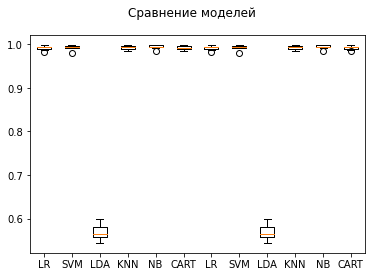

In [ ]:
fig=pyplot.figure()
fig.suptitle('Сравнение моделей')
ax=fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

Вывод: лучшими являются первые 3 модели.